In [2]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=db6e3f1ac7988cfaf54b8e171303bf76985e149460e479f1b243373f74d7b3d3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [119]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from roboflow import Roboflow

In [120]:
# 2 projects with 3 models each -> a total of 6 models
# pick the one that suits best

apiKey = ["bzK1X042pq2SWqOQS9t0", "VPr4wYYv2Q7tB49pzRqA"][1] # 2 projects available
version = [1,2,3][2] # both project has total of 3 versions

In [121]:
rf = Roboflow(api_key=apiKey)
projectName = "cs270-team-8"+ ("-mkjrf" if ("VPr4wYYv2Q7tB49pzRqA" == apiKey) else "")
project = rf.workspace().project(projectName)
model = project.version(version).model

loading Roboflow workspace...
loading Roboflow project...


In [122]:
# the name of the image folder
imageFolder = "KakaoTalk_20230517_113848131_10.48.jpg"

In [123]:
# visualize your prediction
result = model.predict(imageFolder, confidence=0, overlap=30).json()

image = cv.imread(imageFolder)

# bounding box of the image
image = cv.rectangle(image,
 (int(result['predictions'][0]['x'] - result['predictions'][0]['width']/2), 
  int(result['predictions'][0]['y'] - result['predictions'][0]['height']/2)), 
 (int(result['predictions'][0]['x'] + result['predictions'][0]['width']/2), 
  int(result['predictions'][0]['y'] + result['predictions'][0]['height']/2)), 
   (0,0,255), 3)

# coordinates for the middle of the head will become as following
# head_middle_x = int(result['predictions'][0]['x']
# head_middle_y = int(result['predictions'][0]['y']

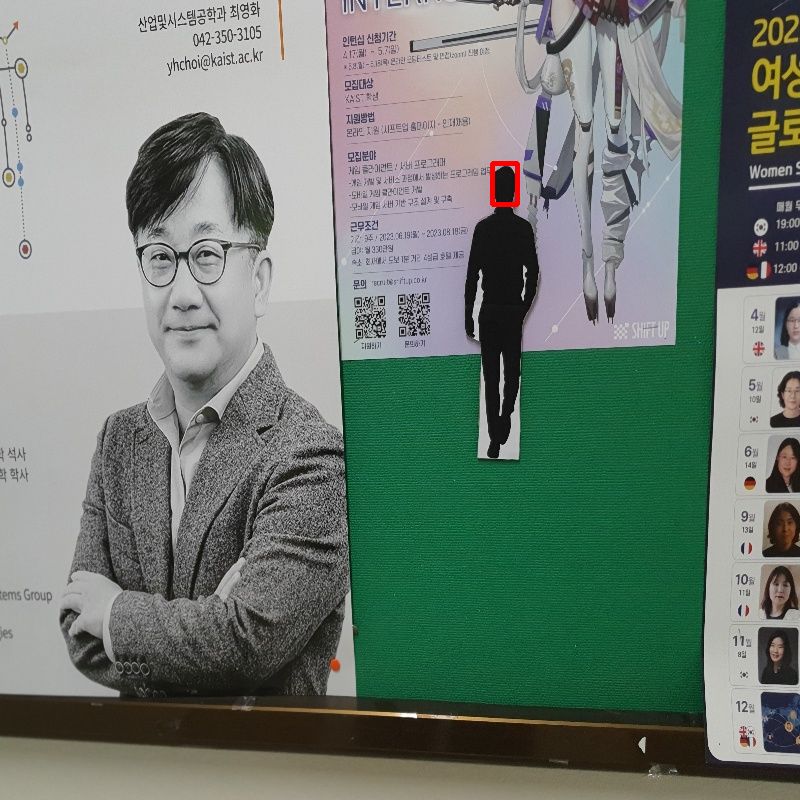

In [124]:
cv2_imshow(image)